# Natural Language Processing with Disaster Tweets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyte the data

In [2]:
training_tweets_df = pd.read_csv("data/train.csv")
training_tweets_df

id keyword location   
0         1     NaN      NaN  \
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [3]:
training_tweets_df = training_tweets_df.set_index("id")
training_tweets_df

keyword location                                               text   
id                                                                          
1         NaN      NaN  Our Deeds are the Reason of this #earthquake M...  \
4         NaN      NaN             Forest fire near La Ronge Sask. Canada   
5         NaN      NaN  All residents asked to 'shelter in place' are ...   
6         NaN      NaN  13,000 people receive #wildfires evacuation or...   
7         NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   
...       ...      ...                                                ...   
10869     NaN      NaN  Two giant cranes holding a bridge collapse int...   
10870     NaN      NaN  @aria_ahrary @TheTawniest The out of control w...   
10871     NaN      NaN  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
10872     NaN      NaN  Police investigating after an e-bike collided ...   
10873     NaN      NaN  The Latest: More Homes Razed by Northern Calif...   

       target  
id             
1           1  
4           1  
5           1  
6           1  
7           1  
...       ...  
10869       1  
10870       1  
10871       1  
10872       1  
10873       1  

[7613 rows x 4 columns]

In [4]:
training_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


## Keywords

Text(0.5, 1.0, 'Keywords')

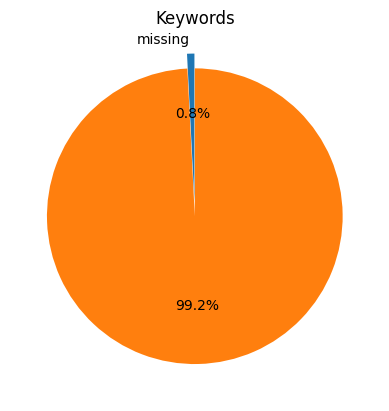

In [5]:
labels = ["missing", '']
missing_keywords = round(training_tweets_df.keyword.isna().sum() / len(training_tweets_df.keyword), 3)

plt.pie([missing_keywords * 100, 100 - missing_keywords * 100], labels=labels, autopct='%1.1f%%', explode=(0.1,0), startangle=90)
plt.title("Keywords")

In [6]:
training_tweets_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

## Location

Text(0.5, 1.0, 'Location')

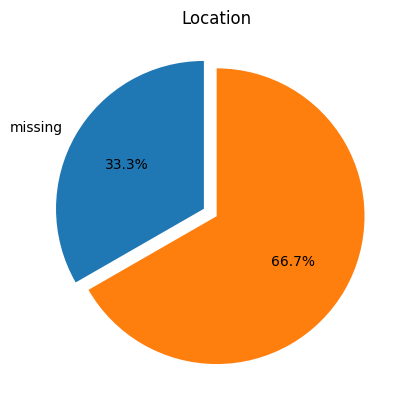

In [7]:
labels = ["missing", '']
missing_locations = round(training_tweets_df.location.isna().sum() / len(training_tweets_df.location), 3)

plt.pie([missing_locations * 100, 100 - missing_locations * 100], labels=labels, autopct='%1.1f%%', explode=(0.1,0), startangle=90)
plt.title("Location")

In [8]:
training_tweets_df.isna().sum()

keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
# Drop missing data columns
training_tweets_df = training_tweets_df.drop(columns=["keyword", "location"])
training_tweets_df

text  target
id                                                              
1      Our Deeds are the Reason of this #earthquake M...       1
4                 Forest fire near La Ronge Sask. Canada       1
5      All residents asked to 'shelter in place' are ...       1
6      13,000 people receive #wildfires evacuation or...       1
7      Just got sent this photo from Ruby #Alaska as ...       1
...                                                  ...     ...
10869  Two giant cranes holding a bridge collapse int...       1
10870  @aria_ahrary @TheTawniest The out of control w...       1
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
10872  Police investigating after an e-bike collided ...       1
10873  The Latest: More Homes Razed by Northern Calif...       1

[7613 rows x 2 columns]

## Text

I will extract the following information form text column and use it as additional features:

* tweet lenght
* number of words in a tweet
* average lenght of words in a tweet

### Tweet lenght

In [10]:
training_tweets_df["lenght"] = training_tweets_df.text.str.len()
training_tweets_df

text  target  lenght
id                                                                      
1      Our Deeds are the Reason of this #earthquake M...       1      69
4                 Forest fire near La Ronge Sask. Canada       1      38
5      All residents asked to 'shelter in place' are ...       1     133
6      13,000 people receive #wildfires evacuation or...       1      65
7      Just got sent this photo from Ruby #Alaska as ...       1      88
...                                                  ...     ...     ...
10869  Two giant cranes holding a bridge collapse int...       1      83
10870  @aria_ahrary @TheTawniest The out of control w...       1     125
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1      65
10872  Police investigating after an e-bike collided ...       1     137
10873  The Latest: More Homes Razed by Northern Calif...       1      94

[7613 rows x 3 columns]

In [11]:
min_lenght = training_tweets_df.lenght.min()
max_lenght = training_tweets_df.lenght.max()

print(f"The min lenght of tweet is: {min_lenght}")
print(f"The max lenght of tweet is: {max_lenght}")

The min lenght of tweet is: 7
The max lenght of tweet is: 157


### Number of words in tweet

In [12]:
training_tweets_df["numb_words"] = [len(word) for word in training_tweets_df.text.str.split()]
training_tweets_df

text  target  lenght   
id                                                                         
1      Our Deeds are the Reason of this #earthquake M...       1      69  \
4                 Forest fire near La Ronge Sask. Canada       1      38   
5      All residents asked to 'shelter in place' are ...       1     133   
6      13,000 people receive #wildfires evacuation or...       1      65   
7      Just got sent this photo from Ruby #Alaska as ...       1      88   
...                                                  ...     ...     ...   
10869  Two giant cranes holding a bridge collapse int...       1      83   
10870  @aria_ahrary @TheTawniest The out of control w...       1     125   
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1      65   
10872  Police investigating after an e-bike collided ...       1     137   
10873  The Latest: More Homes Razed by Northern Calif...       1      94   

       numb_words  
id                 
1              13  
4               7  
5              22  
6               8  
7              16  
...           ...  
10869          11  
10870          20  
10871           8  
10872          19  
10873          13  

[7613 rows x 4 columns]

In [13]:
min_word_lenght = training_tweets_df.numb_words.min()
max_word_lenght = training_tweets_df.numb_words.max()

print(f"The min lenght of each word is: {min_word_lenght}")
print(f"The max lenght of each word is: {max_word_lenght}")

The min lenght of each word is: 1
The max lenght of each word is: 31


### Average lenght of words in tweet

In [14]:
training_tweets_df["avg_word_lenght"] = [np.mean([len(word) for word in words]) for words in training_tweets_df.text.str.split()]
training_tweets_df

text  target  lenght   
id                                                                         
1      Our Deeds are the Reason of this #earthquake M...       1      69  \
4                 Forest fire near La Ronge Sask. Canada       1      38   
5      All residents asked to 'shelter in place' are ...       1     133   
6      13,000 people receive #wildfires evacuation or...       1      65   
7      Just got sent this photo from Ruby #Alaska as ...       1      88   
...                                                  ...     ...     ...   
10869  Two giant cranes holding a bridge collapse int...       1      83   
10870  @aria_ahrary @TheTawniest The out of control w...       1     125   
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1      65   
10872  Police investigating after an e-bike collided ...       1     137   
10873  The Latest: More Homes Razed by Northern Calif...       1      94   

       numb_words  avg_word_lenght  
id                                  
1              13         4.384615  
4               7         4.571429  
5              22         5.090909  
6               8         7.125000  
7              16         4.500000  
...           ...              ...  
10869          11         6.636364  
10870          20         5.300000  
10871           8         7.250000  
10872          19         6.263158  
10873          13         6.307692  

[7613 rows x 5 columns]

In [15]:
min_avg_word_lenght = training_tweets_df.avg_word_lenght.min()
max_avg_word_lenght = training_tweets_df.avg_word_lenght.max()

print(f"The min lenght of average word is: {min_avg_word_lenght}")
print(f"The max lenght of average word is: {max_avg_word_lenght}")

The min lenght of average word is: 2.25
The max lenght of average word is: 19.333333333333332


### Analyze outliers

In [16]:
training_tweets_df.loc[training_tweets_df["avg_word_lenght"] == training_tweets_df["avg_word_lenght"].max()]

text  target  lenght   
id                                                                        
2625  Intact+MH370+Part+Lifts+Odds+Plane+Glided+Not+...       1     121  \

      numb_words  avg_word_lenght  
id                                 
2625           6        19.333333

In [17]:
## Clean the Text column form specil charackters, links and make all characters in lower case

import re

def remove_special_characters(text):
    # Remove all special characters 
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    return text

def remove_links(text):
    # Remove all links
    text = re.sub(r'[https?:[\w\/.-_]*]', '', text)
    
    return text

def clean_data(df, col_name):
    column = col_name
    df[column] = df[column].apply(lambda x: str(x).lower())
    
    df[column] = df[column].apply(lambda x: remove_special_characters(x))
    df[column] = df[column].apply(lambda x: remove_links(x))
    
    return df

In [18]:
clean_data(training_tweets_df, "text")
training_tweets_df

text  target  lenght   
id                                                                         
1      our deeds are the reason of this earthquake ma...       1      69  \
4                  forest fire near la ronge sask canada       1      38   
5      all residents asked to shelter in place are be...       1     133   
6      13000 people receive wildfires evacuation orde...       1      65   
7      just got sent this photo from ruby alaska as s...       1      88   
...                                                  ...     ...     ...   
10869  two giant cranes holding a bridge collapse int...       1      83   
10870  ariaahrary thetawniest the out of control wild...       1     125   
10871  m194 0104 utc5km s of volcano hawaii httptcozd...       1      65   
10872  police investigating after an ebike collided w...       1     137   
10873  the latest more homes razed by northern califo...       1      94   

       numb_words  avg_word_lenght  
id                                  
1              13         4.384615  
4               7         4.571429  
5              22         5.090909  
6               8         7.125000  
7              16         4.500000  
...           ...              ...  
10869          11         6.636364  
10870          20         5.300000  
10871           8         7.250000  
10872          19         6.263158  
10873          13         6.307692  

[7613 rows x 5 columns]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from gensim.models import Word2Vec

In [24]:
# text = training_tweets_df["text"]
# target = training_tweets_df["target"]

# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(text)


In [25]:
# Split data to train the model 
X_train, X_test, y_train, y_test = train_test_split(training_tweets_df.text, training_tweets_df.target, test_size=0.33, random_state=99066, stratify=training_tweets_df.target)

In [26]:
def run_svm(model, X_train, X_test, y_train, x_test):
    model.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    
    print()
    print("Classification Report")
    print(classification_report(y_test, y_predict))

In [29]:
# Train Word2Vec model on the training data
sentences = [tweet.split() for tweet in X_train]
print(f"This are the sentences: {sentences}")

model = Word2Vec(sentences, sg=1, vector_size=100, window=5, min_count=5, workers=4)

This are the sentences: [['check', 'out', 'reddit', 'will', 'now', 'quarantine', 'offensive', 'content', 'httptcoew5wzc07fo'], ['mentaltwitter', 'note', 'make', 'sure', 'my', 'smoke', 'alarm', 'battery', 'is', 'up', 'to', 'snuff', 'at', 'all', 'times', 'or', 'face', 'many', 'twitter', 'reminders', 'of', 'changing', 'my', 'battery'], ['kristenkoin6', 'yay', 'good', 'cooler', 'weather', 'for', 'pdxabq', 'nm', 'is', 'feeling', 'the', 'heat', 'wave', 'now', 'bcuz', 'my', 'rain', 'dances', 'arent', 'working'], ['james', 'kunstler', 'how', 'bad', 'architecture', 'wrecked', 'cities', 'httptcoac6i3te8mt', 'residualincome', 'mlm', 'httptcowq0jlshw1g'], ['when', 'love', 'and', 'hate', 'collided', 'part', 'ii', 'lanjut', 'dirumah', 'yagitudeh', 'jake', 'at', 'rumah', 'cipinang', 'httpstcoyilt1bb68k'], ['most', 'of', 'us', 'ddnt', 'get', 'this', 'english', 'rt', 'reigncoco', 'the', 'world', 'is', 'inundated', 'with', 'ostentatious', 'people', 'stay', 'woke'], ['brunette', 'beauty', 'night', 'a', '

In [30]:
# Prepare word embeddings for training and validate data
vectorizer = TfidfVectorizer(analyzer=lambda x: x) # Dummy function to bypass tokenization
vectorizer.fit(X_train)

TfidfVectorizer(analyzer=<function <lambda> at 0x00000284D8A387C0>)

In [31]:
X_train_embeddings = vectorizer.transform(X_train).toarray()
X_test_embeddings = vectorizer.transform(X_test).toarray()

In [32]:
# Train a Logisic regression model
logreg = LogisticRegression()
logreg.fit(X_train_embeddings, y_train)

LogisticRegression()

In [33]:
# I make prediction on the validation set
train_prediction = logreg.predict(X_test_embeddings)
accuracy_score(y_test, train_prediction)

0.6565857540787903

In [34]:
print(f"F1 Score: {f1_score(train_prediction, y_test)}")

F1 Score: 0.5625950329447542


## Load test data for testing

In [35]:
test_tweets_df = pd.read_csv("data/test.csv")
test_tweets_df

id keyword location   
0         0     NaN      NaN  \
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather Outlook (HWO) htt...  
3262  #CityofCalgary has activated its Municipal Eme...  

[3263 rows x 4 columns]

In [36]:
test_tweets_df = test_tweets_df.set_index("id")
test_tweets_df

keyword location                                               text
id                                                                       
0         NaN      NaN                 Just happened a terrible car crash
2         NaN      NaN  Heard about #earthquake is different cities, s...
3         NaN      NaN  there is a forest fire at spot pond, geese are...
9         NaN      NaN           Apocalypse lighting. #Spokane #wildfires
11        NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
...       ...      ...                                                ...
10861     NaN      NaN  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10865     NaN      NaN  Storm in RI worse than last hurricane. My city...
10868     NaN      NaN  Green Line derailment in Chicago http://t.co/U...
10874     NaN      NaN  MEG issues Hazardous Weather Outlook (HWO) htt...
10875     NaN      NaN  #CityofCalgary has activated its Municipal Eme...

[3263 rows x 3 columns]

In [37]:
# Drop missing data columns
test_tweets_df = test_tweets_df.drop(columns=["keyword", "location"])
test_tweets_df

text
id                                                      
0                     Just happened a terrible car crash
2      Heard about #earthquake is different cities, s...
3      there is a forest fire at spot pond, geese are...
9               Apocalypse lighting. #Spokane #wildfires
11         Typhoon Soudelor kills 28 in China and Taiwan
...                                                  ...
10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10865  Storm in RI worse than last hurricane. My city...
10868  Green Line derailment in Chicago http://t.co/U...
10874  MEG issues Hazardous Weather Outlook (HWO) htt...
10875  #CityofCalgary has activated its Municipal Eme...

[3263 rows x 1 columns]

In [38]:
clean_data(test_tweets_df, "text")
test_tweets_df

text
id                                                      
0                     just happened a terrible car crash
2      heard about earthquake is different cities sta...
3      there is a forest fire at spot pond geese are ...
9                  apocalypse lighting spokane wildfires
11         typhoon soudelor kills 28 in china and taiwan
...                                                  ...
10861  earthquake safety los angeles  safety fastener...
10865  storm in ri worse than last hurricane my citya...
10868  green line derailment in chicago httptcoutbxlc...
10874  meg issues hazardous weather outlook hwo httpt...
10875  cityofcalgary has activated its municipal emer...

[3263 rows x 1 columns]

In [39]:
X_test_vector = vectorizer.transform(test_tweets_df["text"])

In [42]:
test_prediction = logreg.predict(X_test_vector)

In [43]:
result_data = pd.DataFrame({
    "id": test_tweets_df.index,
    "target": test_prediction,
})
result_data.target

0       1
1       0
2       0
3       1
4       0
       ..
3258    0
3259    1
3260    0
3261    0
3262    0
Name: target, Length: 3263, dtype: int64

In [44]:
predict = pd.DataFrame(data=result_data).set_index("id")
predict.to_csv("submission_second.csv")